####  Abstract
##### Typ zadania: Klasyfikacja binarna (Binary Classification).
##### Target: RET - binarna etykieta okreslajaca nzak rezydualnego zwrotu akcji w czasie t
##### Metryka ewaluacji: accuracy 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

np.random.seed(42)

In [11]:
import os

DATA_DIR = '../data'
X_PATH = os.path.join(DATA_DIR, 'x_train.csv')
Y_PATH = os.path.join(DATA_DIR, 'y_train.csv')

try:
    X_train = pd.read_csv(X_PATH, index_col='ID')
    y_train = pd.read_csv(Y_PATH, index_col='ID')

    df = pd.merge(X_train, y_train, left_index=True, right_index=True)

    print(f"Data loaded.")
    print(f"Shape: {df.shape}")

except FileNotFoundError:
    print("Not found")

Data loaded.
Shape: (418595, 47)


In [12]:
display(df.head())

print("\nInfo:")
print(df.info())

,DATE,STOCK,INDUSTRY,INDUSTRY_GROUP,SECTOR,SUB_INDUSTRY,RET_1,VOLUME_1,RET_2,VOLUME_2,...,VOLUME_16,RET_17,VOLUME_17,RET_18,VOLUME_18,RET_19,VOLUME_19,RET_20,VOLUME_20,RET
ID,,,,,,,,,,,,,,,,,,,,,
0,0,2,18,5,3,44,-0.015748,0.147931,-0.015504,0.179183,...,0.630899,0.003254,-0.379412,0.008752,-0.110597,-0.012959,0.174521,-0.002155,-0.000937,True
1,0,3,43,15,6,104,0.003984,NaN,-0.090580,NaN,...,NaN,0.003774,NaN,-0.018518,NaN,-0.028777,NaN,-0.034722,NaN,True
2,0,4,57,20,8,142,0.000440,-0.096282,-0.058896,0.084771,...,-0.010336,-0.017612,-0.354333,-0.006562,-0.519391,-0.012101,-0.356157,-0.006867,-0.308868,False
3,0,8,1,1,1,2,0.031298,-0.429540,0.007756,-0.089919,...,0.012105,0.033824,-0.290178,-0.001468,-0.663834,-0.013520,-0.562126,-0.036745,-0.631458,False
4,0,14,36,12,5,92,0.027273,-0.847155,-0.039302,-0.943033,...,-0.277083,-0.012659,0.139086,0.004237,-0.017547,0.004256,0.579510,-0.040817,0.802806,False



Info:
<class 'pandas.core.frame.DataFrame'>
Index: 418595 entries, 0 to 418594
Data columns (total 47 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            418595 non-null  int64  
 1   STOCK           418595 non-null  int64  
 2   INDUSTRY        418595 non-null  int64  
 3   INDUSTRY_GROUP  418595 non-null  int64  
 4   SECTOR          418595 non-null  int64  
 5   SUB_INDUSTRY    418595 non-null  int64  
 6   RET_1           416236 non-null  float64
 7   VOLUME_1        353570 non-null  float64
 8   RET_2           416130 non-null  float64
 9   VOLUME_2        352209 non-null  float64
 10  RET_3           416088 non-null  float64
 11  VOLUME_3        350776 non-null  float64
 12  RET_4           416051 non-null  float64
 13  VOLUME_4        347598 non-null  float64
 14  RET_5           416011 non-null  float64
 15  VOLUME_5        343902 non-null  float64
 16  RET_6           415998 non-null  float64
 17  VOLUME_6

C:\Users\aszki\AppData\Local\Temp\ipykernel_58060\325051706.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['RET'], palette='viridis')


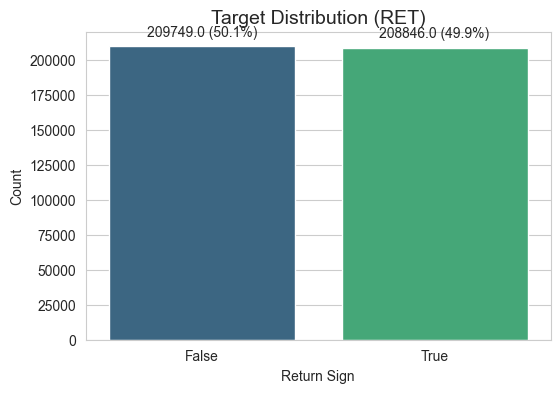

Class balance:
RET
False    50.107861
True     49.892139
Name: proportion, dtype: float64


In [13]:
# target balance

target_counts = df['RET'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
ax = sns.countplot(x=df['RET'], palette='viridis')

plt.title('Target Distribution (RET)', fontsize=14)
plt.xlabel('Return Sign')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()} ({p.get_height()/len(df):.1%})',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

print(f"Class balance:\n{target_counts}")

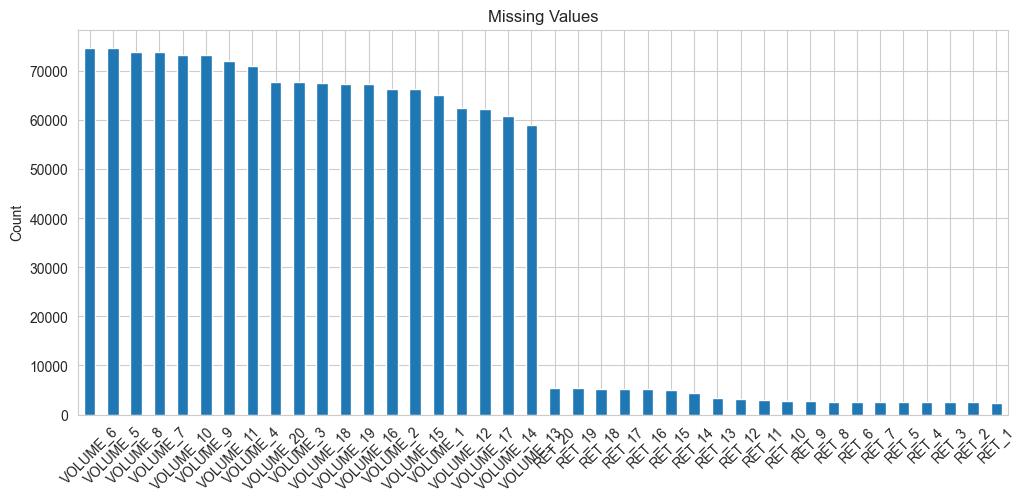

In [14]:
# missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

if not missing.empty:
    plt.figure(figsize=(12, 5))
    missing.plot(kind='bar')
    plt.title('Missing Values')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No missing")

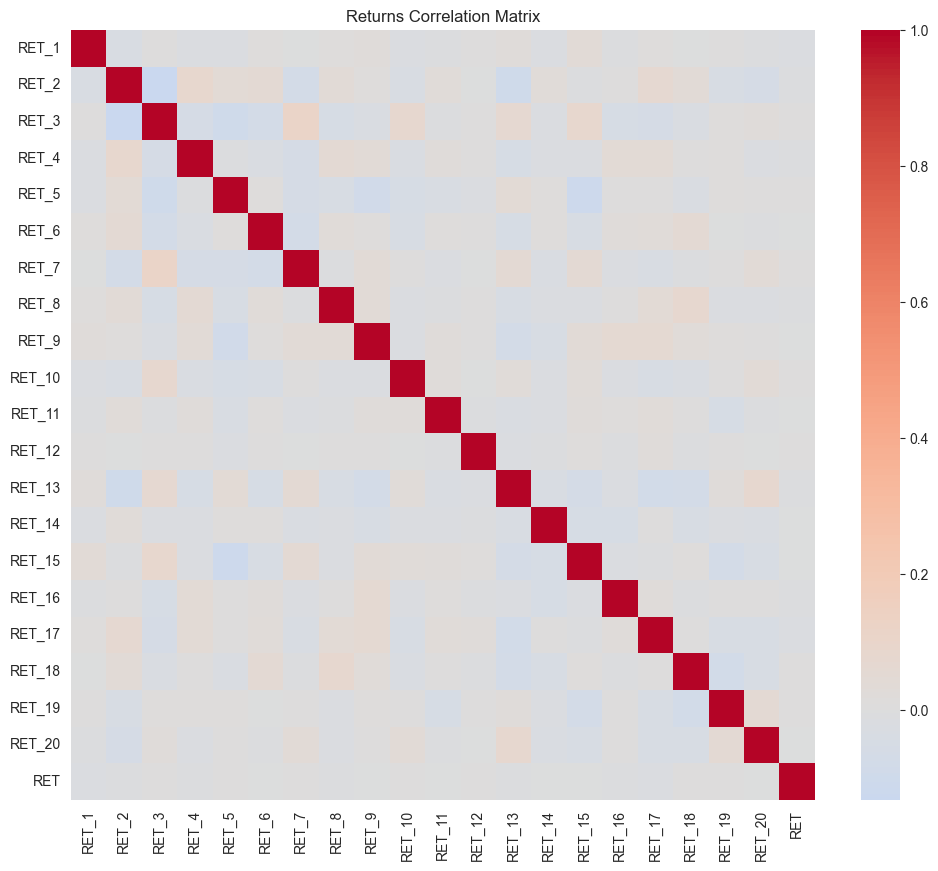

Top 10:
RET       1.000000
RET_1    -0.016845
RET_17   -0.014077
RET_16   -0.012448
RET_2    -0.009127
RET_8    -0.008396
RET_13   -0.005953
RET_7     0.005828
RET_10    0.005371
RET_4    -0.005003
Name: RET, dtype: float64


In [15]:
# RET correlations
ret_cols = [col for col in df.columns if 'RET' in col]
corr_matrix = df[ret_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Returns Correlation Matrix')
plt.show()

print("Top 10:")
print(corr_matrix['RET'].sort_values(key=abs, ascending=False).head(10))

C:\Users\aszki\AppData\Local\Temp\ipykernel_58060\578519202.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='SECTOR', order=df['SECTOR'].value_counts().index, palette='magma')


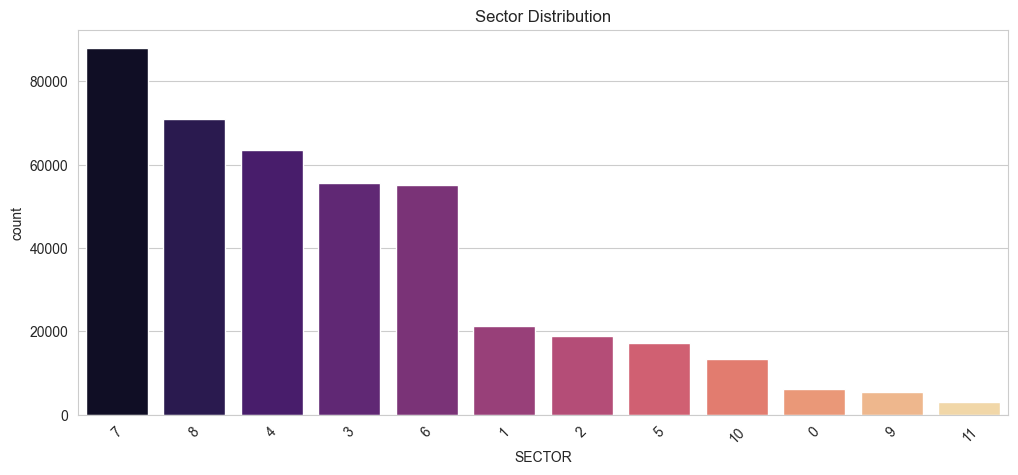

In [16]:
# sector distribution
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='SECTOR', order=df['SECTOR'].value_counts().index, palette='magma')
plt.title('Sector Distribution')
plt.xticks(rotation=45)
plt.show()

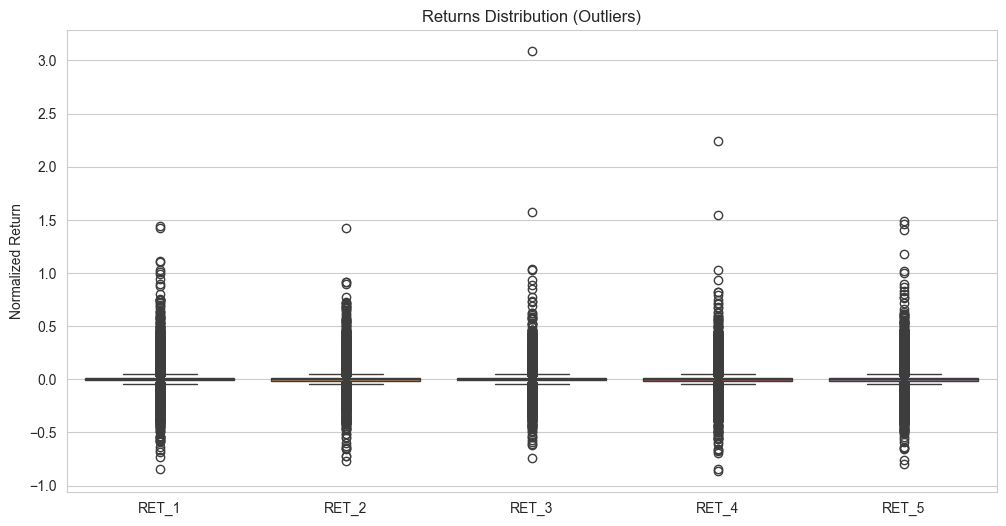

In [17]:
cols_to_plot = ['RET_1', 'RET_2', 'RET_3', 'RET_4', 'RET_5']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[cols_to_plot])
plt.title('Returns Distribution (Outliers)')
plt.ylabel('Normalized Return')
plt.show()

EDA:

-> idealny balans klas - zmienna celowa 'ret' rozklada sie niemal idealnie pol na pol (ok. 50% wzrostow i 50% spadkow), co oznacza, ze nie musimy martwic sie o nierowne wagi klas.

-> brak liniowosci - macierz korelacji jest "blada", co pokazuje brak prostych liniowych zaleznosci miedzy historycznymi zwrotami a przyszlym wynikiem.

-> duzo outlierow - wykresy pudelkowe pokazuja splaszczone pudelka i mase kropek (wartosci odstajacych), co sugeruje, ze standardowe skalowanie (standardscaler) moze popsuc dane.

-> braki w danych - brakuje glownie danych o wolumenie (volume), co trzeba uzupelnic zerami lub mediana.

-> rozne sektory - dane pochodza z wielu roznych sektorow, wiec warto wykorzystac ta informacje w modelu.

TO DO:

-> preprocessing - uzupelnienie brakow w kolumnach volume zerami (zgodnie z benchmarkiem) i zakodowanie sektorow (one-hot encoding).

-> feature engineering - skoro nie ma prostej korelacji, trzeba stworzyc wlasne cechy: srednie kroczace, zmiennosc (odchylenie standardowe) z ostatnich 5-10 dni.

-> wybor modelu - rezygnujemy z prostych modeli liniowych na rzecz drzew decyzyjnych (random forest / xgboost), ktore poradza sobie z outlierami i brakiem liniowosci.